Simple Linear Regression

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import scikit-learn modules
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV     


In [2]:
Icecream=pd.read_csv("Ice Cream Sales.csv")
type(Icecream)
df=Icecream

## Define the Training Features and Target Variable

In [3]:
x=df["Temperature"]
y=df["Ice Cream Profits"]
print(x,y)

0       39
1       40
2       41
3       42
4       43
      ... 
360     99
361     99
362     99
363    101
364    101
Name: Temperature, Length: 365, dtype: int64 0      13.17
1      11.88
2      18.82
3      18.65
4      17.02
       ...  
360    85.13
361    87.08
362    89.29
363    81.91
364    85.02
Name: Ice Cream Profits, Length: 365, dtype: float64


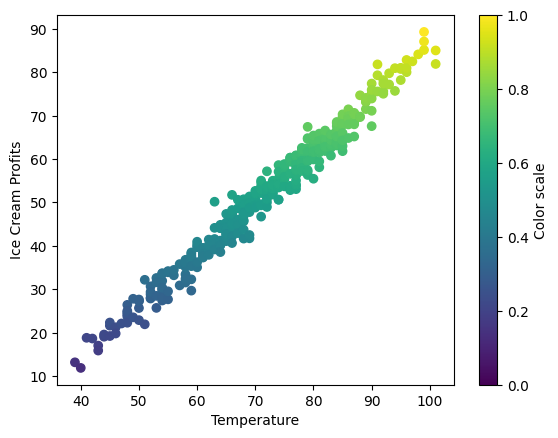

In [8]:
colors = plt.cm.viridis(y / max(y))  # Using viridis colormap, normalize y for color mapping

plt.scatter(x, y, color=colors)
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")
plt.colorbar(label="Color scale")
plt.show()

Text(0, 0.5, 'Ice Cream Profits')

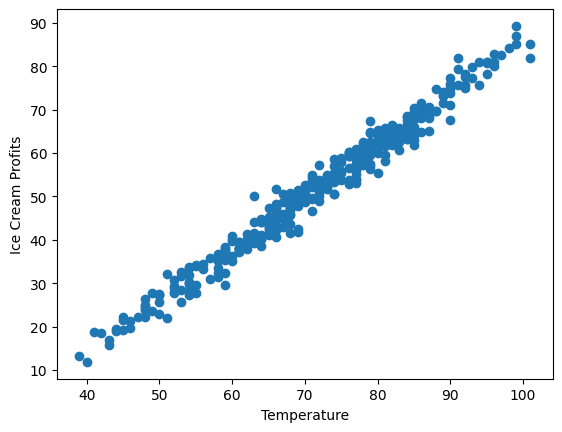

In [9]:
plt.scatter(x,y)
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")

## Split the Dataset into Training and Testing Portion

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21)

In [11]:
x_train

155    70
213    76
283    83
176    73
102    65
       ..
120    66
48     55
260    80
312    86
207    76
Name: Temperature, Length: 292, dtype: int64

In [12]:
x_train=np.array(x_train).reshape(-1, 1)
x_test=np.array(x_test).reshape(-1, 1)
y_train=np.array(x_train).reshape(-1, 1)
y_test=np.array(x_test).reshape(-1, 1)

print("Shape of x_train:", x_train.shape)

Shape of x_train: (292, 1)


## Linear the Features

In [13]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
c=lr.intercept_
c

array([-1.42108547e-14])

In [15]:
m=lr.coef_
m

array([[1.]])

In [16]:
y_pred_train=m*x_train+c
y_pred_train

array([[ 70.],
       [ 76.],
       [ 83.],
       [ 73.],
       [ 65.],
       [ 70.],
       [ 78.],
       [ 74.],
       [ 91.],
       [ 84.],
       [ 75.],
       [ 88.],
       [ 48.],
       [ 79.],
       [ 98.],
       [ 50.],
       [ 85.],
       [ 70.],
       [ 50.],
       [ 52.],
       [ 58.],
       [ 66.],
       [ 84.],
       [ 92.],
       [ 76.],
       [ 57.],
       [ 84.],
       [ 61.],
       [ 74.],
       [ 68.],
       [ 64.],
       [ 62.],
       [ 54.],
       [ 72.],
       [ 80.],
       [ 52.],
       [ 74.],
       [ 79.],
       [ 78.],
       [ 60.],
       [ 54.],
       [ 71.],
       [ 55.],
       [ 70.],
       [ 72.],
       [ 81.],
       [ 58.],
       [ 68.],
       [ 53.],
       [ 66.],
       [ 73.],
       [ 84.],
       [ 54.],
       [ 69.],
       [ 65.],
       [ 89.],
       [ 85.],
       [ 75.],
       [ 77.],
       [ 87.],
       [ 88.],
       [ 91.],
       [ 71.],
       [ 69.],
       [ 72.],
       [ 73.],
       [ 7

In [17]:
y_pred_train1=lr.predict(x_train)
y_pred_train1.flatten()

array([ 70.,  76.,  83.,  73.,  65.,  70.,  78.,  74.,  91.,  84.,  75.,
        88.,  48.,  79.,  98.,  50.,  85.,  70.,  50.,  52.,  58.,  66.,
        84.,  92.,  76.,  57.,  84.,  61.,  74.,  68.,  64.,  62.,  54.,
        72.,  80.,  52.,  74.,  79.,  78.,  60.,  54.,  71.,  55.,  70.,
        72.,  81.,  58.,  68.,  53.,  66.,  73.,  84.,  54.,  69.,  65.,
        89.,  85.,  75.,  77.,  87.,  88.,  91.,  71.,  69.,  72.,  73.,
        77.,  67.,  75.,  58.,  71.,  79.,  59.,  76.,  85.,  90.,  79.,
        54.,  66.,  48.,  74.,  65.,  61.,  49.,  74.,  79.,  48.,  70.,
        66.,  76.,  93.,  68.,  66.,  86.,  90.,  66.,  80.,  92.,  63.,
        65.,  62.,  81.,  61.,  78.,  41.,  77.,  54.,  61.,  47.,  62.,
        86.,  82.,  96.,  74.,  77.,  97.,  69.,  68.,  87.,  50.,  77.,
        64.,  82.,  57.,  60.,  82.,  46.,  77.,  72.,  70.,  68.,  95.,
        48.,  66.,  69.,  90.,  90.,  52.,  63.,  76.,  53.,  68.,  65.,
        77.,  72.,  54.,  70.,  89.,  65.,  80.,  6

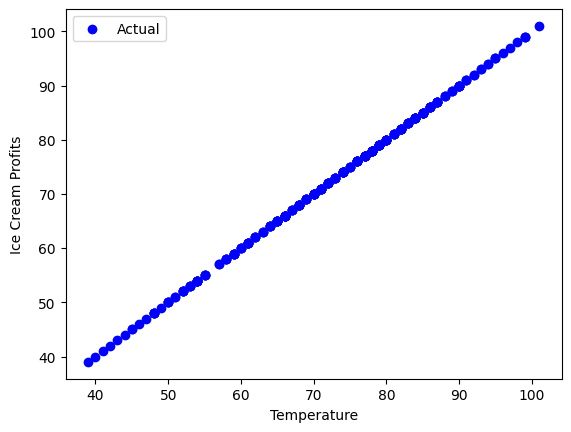

In [35]:
plt.scatter(x_train, y_train, color="blue", label="Actual")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")
plt.legend()
plt.show()

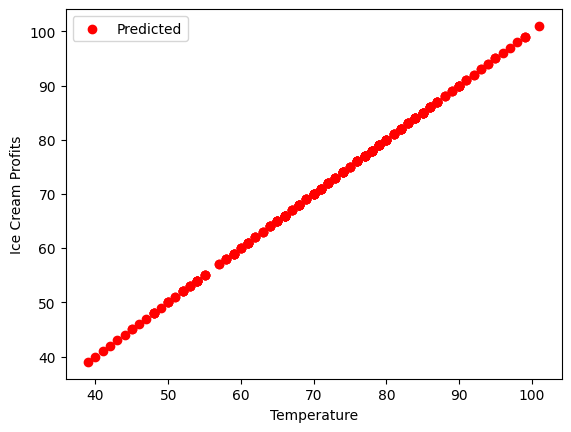

In [34]:
plt.scatter(x_train, y_pred_train1, color="red", label="Predicted")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")
plt.legend()
plt.show()

In [19]:
y_pred=lr.predict(x_test)
y_pred.flatten()

array([ 64.,  71.,  49.,  74.,  59.,  58.,  65.,  82.,  96.,  61.,  89.,
        46.,  81.,  77.,  77.,  92.,  84.,  82.,  85.,  92.,  81.,  66.,
        74.,  56.,  75.,  76.,  79.,  72.,  84.,  69.,  68.,  95.,  45.,
        56.,  68.,  59.,  81.,  75.,  64.,  77.,  48.,  79.,  64.,  81.,
        58.,  67.,  78.,  54.,  76.,  96.,  82.,  84.,  73.,  72.,  68.,
        63.,  60.,  61.,  84.,  64.,  73.,  63.,  72.,  67.,  77.,  44.,
        73.,  85., 101.,  86.,  50.,  80.,  43.])

Text(0, 0.5, 'Ice Cream Profits')

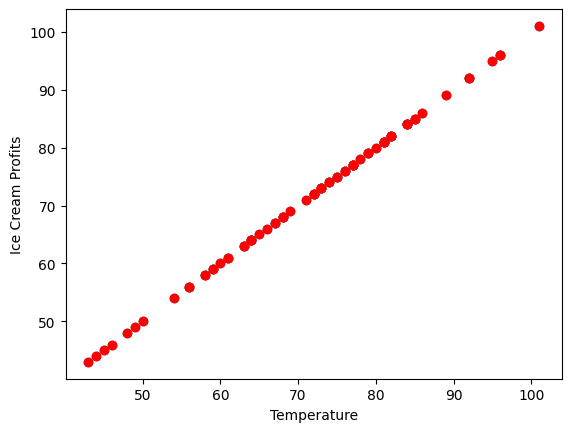

In [20]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred,color="red")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")

In [21]:
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  1.1065665300634466e-29


In [22]:
# RMSE
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  3.3265094770095673e-15


In [23]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  9.733462133700002e-16


In [24]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  1.0


In [25]:
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)      

MSE -->  1.1065665300634466e-29
RMSE -->  3.3265094770095673e-15
MAE -->  9.733462133700002e-16
R2 -->  1.0


In [26]:


# Define a range of alpha values to search
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)

Best Alpha: 0.1
Tuned Training Data Score: 0.9999999999961703
Tuned Testing Data Score: 0.9999999999961665


In [27]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(x_train)
y_test_pred = ridge_tuned.predict(x_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("Training Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)   


Coefficients (M): [[0.99999804]]
Intercept (c): [0.00014103]
Training Data Metrics:
Mean Squared Error: 6.701878605833867e-10
Mean Absolute Error: 2.1247337826302433e-05
R-squared Score: 0.9999999999961703
Root Mean Squared Error: 2.588798680051013e-05

Testing Data Metrics:
Mean Squared Error: 6.762078653077236e-10
Mean Absolute Error: 2.1065514586246236e-05
R-squared Score: 0.9999999999961665
Root Mean Squared Error: 2.6003997102517213e-05


In [28]:
# Define a wider range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)


Best Alpha: 0.001
Tuned Training Data Score: 0.9999999999999997
Tuned Testing Data Score: 0.9999999999999997


In [29]:
# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)   
   

Best Alpha: 0.001
Tuned Training Data Score: 0.9999999999999997
Tuned Testing Data Score: 0.9999999999999997


In [30]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(x_train)
y_test_pred = ridge_tuned.predict(x_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)     

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("\nTraining Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)


Coefficients (M): [[0.99999998]]
Intercept (c): [1.41028181e-06]

Training Data Metrics:
Mean Squared Error: 6.701904668782178e-14
Mean Absolute Error: 2.124737915229529e-07
R-squared Score: 0.9999999999999997
Root Mean Squared Error: 2.5888037138381463e-07

Testing Data Metrics:
Mean Squared Error: 6.76210492329436e-14
Mean Absolute Error: 2.1065555524603965e-07
R-squared Score: 0.9999999999999997
Root Mean Squared Error: 2.600404761435104e-07
